### Multi-Armed Bandits

In [276]:
import math
import matplotlib.pyplot as plt
import numpy as np

#betaDistribution:
#bd = ((math.factorial(alpha + beta -1)) / ( math.factorial(alpha-1) * math.factorial(beta - 1))) * ((x)**(alpha - 1))*((1-x)**(beta - 1))
#Author: HJFB

def betaDistribution(alpha, beta, x):
    return ((math.factorial(alpha + beta -1)) / ( math.factorial(alpha-1) * math.factorial(beta - 1))) * (((x)**(alpha - 1))*((1-x)**(beta - 1)))

def variance(alpha, beta):
    return ( alpha * beta ) / (((alpha + beta)**2)*(alpha + beta + 1))

def mean(alpha, beta):
    return ( alpha / (alpha + beta))

def update(alpha, beta, reward):
    alpha = alpha + reward
    beta = beta + (1 - reward)
    return alpha, beta

def bandit(probability=0.500):
    reward = 0
    if np.random.rand() < probability:
        reward = 1
    return reward
    
def meansArray(list):
    return [mean(item[0], item[1]) for item in list]

def varianceArray(list):
    return [variance(item[0], item[1]) for item in list]
        
def Thompson(iterations, trueProbability=0.500):
    alpha = 1
    beta = 1
    ablist = []
    for i in range(iterations):
        ab = alpha, beta
        ablist.append(ab)
        reward = bandit(trueProbability)
        alpha, beta = update(alpha, beta, reward)
    return alpha, beta, meansArray(ablist), varianceArray(ablist), ablist

def ThompsonTwo(iterations, banditOne=np.random.rand(), banditTwo=np.random.rand()):
    x = np.arange(0,1,.0001)
    alpha1 =1 
    alpha =1 
    beta1 =1 
    beta = 1
    ablist1 = []
    ablist2 = []
    for i in range(iterations):
        bd1 = betaDistribution(alpha, beta, x)
        bd2 = betaDistribution(alpha1, beta1, x)
        if np.random.beta(alpha, beta) == np.random.beta(alpha1, beta1):
            if np.random.rand() > 0.5:
                reward = bandit(banditOne)
                alpha, beta = update(alpha, beta, reward)
                ablist1.append((alpha, beta))
            else:
                reward = bandit(banditTwo)
                alpha1, beta1 = update(alpha1, beta1, reward)
                ablist2.append((alpha1, beta1))
        elif np.random.beta(alpha, beta) > np.random.beta(alpha1, beta1):
            reward = bandit(banditOne)
            alpha, beta = update(alpha, beta, reward)
            ablist1.append((alpha, beta))
        else:
            reward = bandit(banditTwo)
            alpha1, beta1 = update(alpha1, beta1, reward)
            ablist2.append((alpha1, beta1))
    return alpha, beta, meansArray(ablist1), varianceArray(ablist1), ablist1, alpha1, beta1, meansArray(ablist2), varianceArray(ablist2), ablist2, banditOne, banditTwo

x = np.arange(0,1,.0001)



## 1.1 Thompson Sampling for Single bandit

# 1.1.1 Make several plots of the Beta-density to illustrate the properties

Text(0.5, 1.0, 'properties of Beta-density α = β (symmetric)')

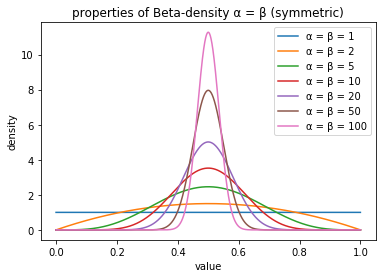

In [239]:
plt.plot(x, betaDistribution(1,1,x))
plt.plot(x, betaDistribution(2,2,x))
plt.plot(x, betaDistribution(5,5,x))
plt.plot(x, betaDistribution(10,10,x))
plt.plot(x, betaDistribution(20,20,x))
plt.plot(x, betaDistribution(50,50,x))
plt.plot(x, betaDistribution(100,100,x))
plt.legend(["α = β = 1", "α = β = 2", "α = β = 5", "α = β = 10", "α = β = 20", "α = β = 50", "α = β = 100"])
plt.xlabel("value")
plt.ylabel("density")
plt.title("properties of Beta-density α = β (symmetric)")
#TODO add legend
#TODO explain in report what we see here (a = b = 1 shows flat line, a = b is symmetric around x = 0.5 (true mean), larger values for a, b produce a more peaked distribution)

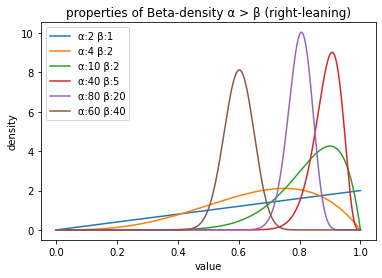

In [240]:
# α > β
plt.plot(x, betaDistribution(2,1,x))
plt.plot(x, betaDistribution(4,2,x))
plt.plot(x, betaDistribution(10,2,x))
plt.plot(x, betaDistribution(40,5,x))
plt.plot(x, betaDistribution(80,20,x))
plt.plot(x, betaDistribution(60,40,x))
plt.title("properties of Beta-density α > β (right-leaning)")
plt.xlabel("value")
plt.ylabel("density")
plt.legend(["α:2 β:1", "α:4 β:2", "α:10 β:2", "α:40 β:5", "α:80 β:20", "α:60 β:40"])


#TODO add legend
#TODO explain in report what we see here (a > b results in right leaning bd)

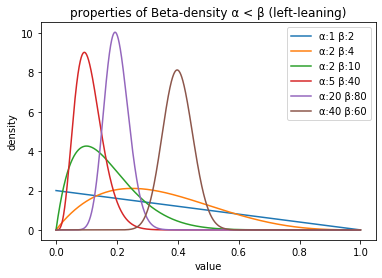

In [241]:
# α < β
plt.plot(x, betaDistribution(1,2,x))
plt.plot(x, betaDistribution(2,4,x))
plt.plot(x, betaDistribution(2,10,x))
plt.plot(x, betaDistribution(5,40,x))
plt.plot(x, betaDistribution(20,80,x))
plt.plot(x, betaDistribution(40,60,x))
plt.title("properties of Beta-density α < β (left-leaning)")
plt.xlabel("value")
plt.ylabel("density")
plt.legend(["α:1 β:2", "α:2 β:4", "α:2 β:10", "α:5 β:40", "α:20 β:80", "α:40 β:60"])
#TODO add legend
#TODO explain in report what we see here (a < b results in left leaning bd)

Text(0, 0.5, 'density')

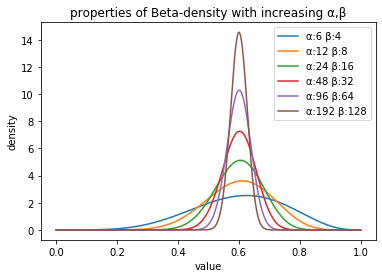

In [242]:
# Larger values of α and β produce a more peaked distribution
plt.plot(x, betaDistribution(6,4,x))
plt.plot(x, betaDistribution(12,8,x))
plt.plot(x, betaDistribution(24,16,x))
plt.plot(x, betaDistribution(48,32,x))
plt.plot(x, betaDistribution(96,64,x))
plt.plot(x, betaDistribution(192,128,x))
plt.legend(["α:6 β:4", "α:12 β:8", "α:24 β:16", "α:48 β:32", "α:96 β:64", "α:192 β:128"])
plt.title("properties of Beta-density with increasing α,β")
plt.xlabel("value")
plt.ylabel("density")
#TODO add legend
#Optional whether this plot will be added to report.

# Implement the Thompson update rule and show experimentally that the Beta-density in- creasingly peaks at the correct value for p

For this experiment we do 200 iterations with, for illustration, one TrueMean at 0.5 and one TrueMean at 0.75

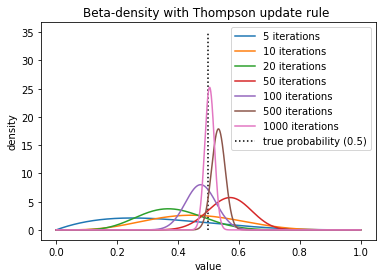

In [243]:
a,b, means, variances, ablist = Thompson(1000, 0.500) # do thomspon update for 1000 iterations at true probability 0.500 


a5,b5 = ablist[4]
a10,b10 = ablist[9]
a20,b20 = ablist[19]
a50, b50 = ablist[49]
a100, b100 = ablist[99]
a500, b500 = ablist[499]



plt.plot(x, betaDistribution(a5,b5,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a10,b10,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a20,b20,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a50,b50,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a100,b100,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a500,b500,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a,b,x)) # plot the beta distribution
plt.vlines(0.50, 0, 35,'black','dotted')

plt.title("Beta-density with Thompson update rule ")
plt.xlabel("value")
plt.ylabel("density")
plt.legend(["5 iterations", "10 iterations", "20 iterations", "50 iterations", "100 iterations", "500 iterations", "1000 iterations", "true probability (0.5)"])

# variables 'means' and 'variances' contain the values for the mean, variance for each iteration (plotted by "plt.plot(means)")
# TODO add legend to plot(s)
# TODO plot means, vars with correct x and y axis
# TODO show in report for 5, 10, 20, 50, 100, 200 iterations that the bd (increasingly) peaks at the correct value (I propose 2 experiments, one with p=0.5, one with p=0.8)

Text(0.5, 1.0, 'evolution of mean over (iteration) time')

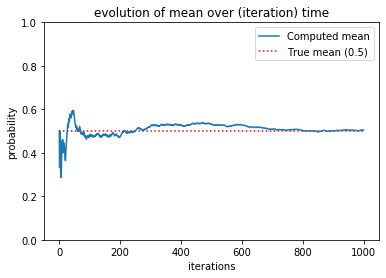

In [244]:
#means for TrueMean = 0.500
plt.ylim(0,1)
plt.plot(means)
plt.hlines(0.5, 0, 1000,'red','dotted')
plt.xlabel("iterations")
plt.ylabel("probability")
plt.legend(["Computed mean", "True mean (0.5)"])
plt.title("evolution of mean over (iteration) time")

Text(0.5, 1.0, 'evolution of variance over (iteration) time')

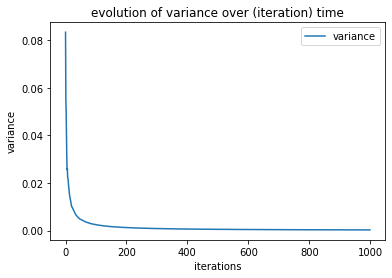

In [245]:
#variances for true probability = 0.500
plt.plot(variances)
plt.legend(["variance"])
plt.xlabel("iterations")
plt.ylabel("variance")
plt.title("evolution of variance over (iteration) time")

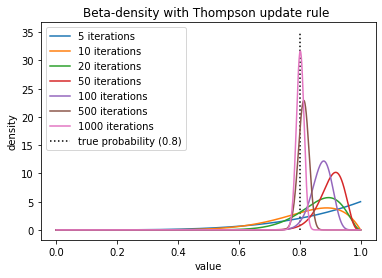

In [246]:
a,b, means, variances, ablist = Thompson(1000, 0.800)

a5,b5 = ablist[4]
a10,b10 = ablist[9]
a20,b20 = ablist[19]
a50, b50 = ablist[49]
a100, b100 = ablist[99]
a500, b500 = ablist[499]



plt.plot(x, betaDistribution(a5,b5,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a10,b10,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a20,b20,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a50,b50,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a100,b100,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a500,b500,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a,b,x)) # plot the beta distribution
plt.vlines(0.80, 0, 35,'black','dotted')

plt.title("Beta-density with Thompson update rule ")
plt.xlabel("value")
plt.ylabel("density")
plt.legend(["5 iterations", "10 iterations", "20 iterations", "50 iterations", "100 iterations", "500 iterations", "1000 iterations", "true probability (0.8)"])


# variables 'means' and 'variances' contain the values for the mean, variance for each iteration (plotted by "plt.plot(means)")
# TODO add legend to plot(s)
# TODO plot means, vars with correct x and y axis
# TODO show in report for 5, 10, 20, 50, 100, 200 iterations that the bd (increasingly) peaks at the correct value (I propose 2 experiments, one with p=0.5, one with p=0.8)

Text(0.5, 1.0, 'evolution of mean over (iteration) time')

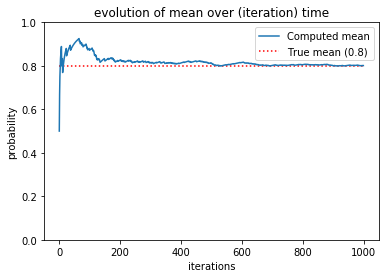

In [247]:
#means for TrueMean = 0.800
plt.ylim(0,1)
plt.plot(means)
plt.hlines(0.80, 0, 1000,'red','dotted')
plt.xlabel("iterations")
plt.ylabel("probability")
plt.legend(["Computed mean", "True mean (0.8)"])
plt.title("evolution of mean over (iteration) time")


Text(0.5, 1.0, 'evolution of variance over (iteration) time')

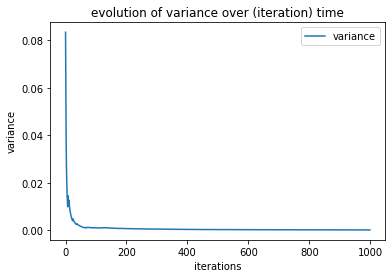

In [248]:
#variances for TrueMean = 0.800
plt.plot(variances)
plt.legend(["variance"])
plt.xlabel("iterations")
plt.ylabel("variance")
plt.title("evolution of variance over (iteration) time")

## Thompson Sampling for Two Bandit Problem

# Write code to implement Thompson sampling for the above scenario;

bandit One has true probability  0.3255454199709029
bandit Two has true probability  0.42132987686817813
Bandit 1 was chosen  50  times (α= 16 β= 36 )
Bandit 2 was chosen  950  times (α= 406 β= 546 )


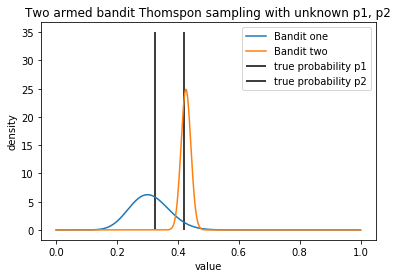

In [279]:
a1, b1, m1, v1, l1, a2, b2, m2, v2, l2, tp1, tp2 = ThompsonTwo(1000) #trueMean 0.5 and 0.75 for purpose of illustration
plt.plot(x, betaDistribution(a1,b1,x)) # plot the beta distribution
plt.plot(x, betaDistribution(a2,b2,x)) # plot the beta distribution
plt.vlines(tp1, 0, 35)
plt.vlines(tp2, 0, 35)
plt.legend(["Bandit one", "Bandit two", "true probability p1", "true probability p2"])
plt.title("Two armed bandit Thomspon sampling with unknown p1, p2")
plt.xlabel("value")
plt.ylabel("density")

print("bandit One has true probability ", tp1)
print("bandit Two has true probability ", tp2)
print("Bandit 1 was chosen ", len(l1), " times (α=", a1, "β=", b1,")")
print("Bandit 2 was chosen ", len(l2), " times (α=", a2, "β=", b2,")")


bandit One has true probability  0.3255454199709029
bandit Two has true probability  0.42132987686817813
Bandit 1 was chosen  50  times (α= 16 β= 36 )
Bandit 2 was chosen  950  times (α= 406 β= 546 )


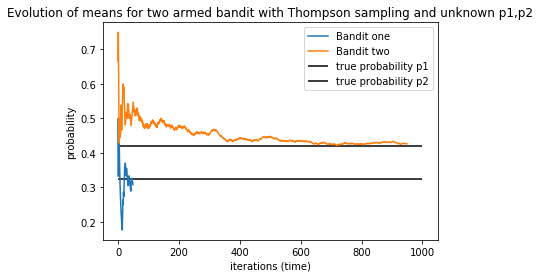

In [280]:
plt.plot(m1)
plt.plot(m2)
plt.hlines(tp1, 0, 1000)
plt.hlines(tp2, 0, 1000)
plt.legend(["Bandit one", "Bandit two", "true probability p1", "true probability p2"])
plt.title("Evolution of means for two armed bandit with Thompson sampling and unknown p1,p2")
plt.xlabel("iterations (time)")
plt.ylabel("probability")
print("bandit One has true probability ", tp1)
print("bandit Two has true probability ", tp2)
print("Bandit 1 was chosen ", len(l1), " times (α=", a1, "β=", b1,")")
print("Bandit 2 was chosen ", len(l2), " times (α=", a2, "β=", b2,")")

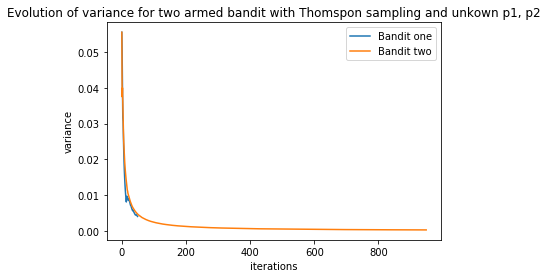

In [281]:
plt.plot(v1)
plt.plot(v2)
plt.xlabel("iterations")
plt.ylabel("variance")
plt.title("Evolution of variance for two armed bandit with Thomspon sampling and unkown p1, p2")
plt.legend(["Bandit one", "Bandit two"])

## Perform numerical experiments in which you compare Thompson sampling with the UCB and ε-greedy approach.

In [41]:
#tbh i have no idea what to do here

In [122]:
test = betaDistribution(40,5,x)
test2 = betaDistribution(80,5,x)


[0.00000000e+000 5.42786831e-150 2.98280862e-138 ... 2.43104187e-007
 1.53145379e-008 0.00000000e+000]


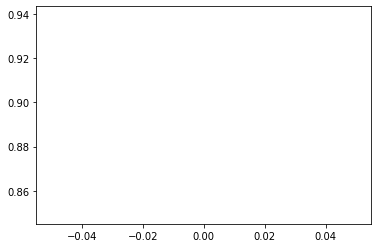